In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167

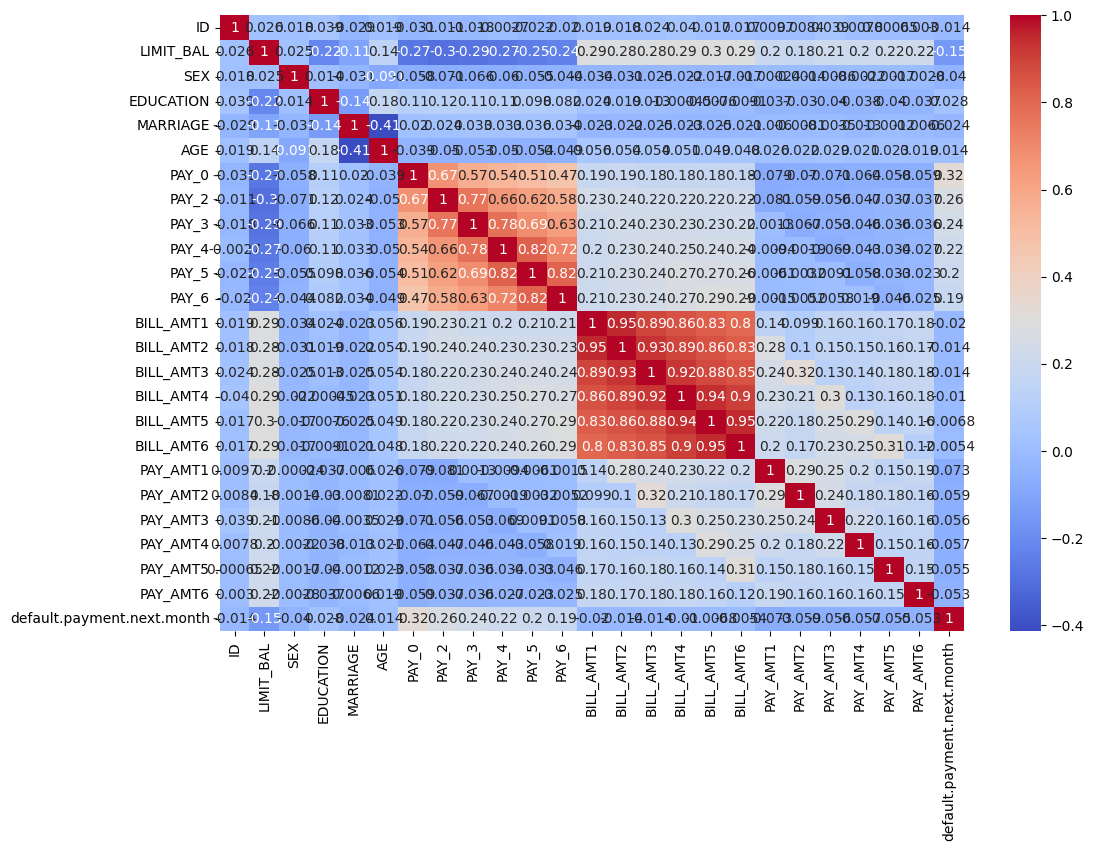

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Key Observations:

    Self-Correlation:
        Each feature is perfectly correlated with itself (correlation of 1), represented by the diagonal red squares.

    Credit Limit (LIMIT_BAL):
        Moderate positive correlation with BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, and BILL_AMT6 (billing amounts for the last six months), indicating that higher credit limits are associated with higher billing amounts.

    Repayment Status (PAY_0 to PAY_6):
        Strong positive correlations among the different repayment statuses (e.g., PAY_0 with PAY_2, PAY_3, etc.). This suggests that individuals who are late in one month tend to be late in subsequent months.

    Billing Amounts (BILL_AMT1 to BILL_AMT6):
        Strong positive correlations among the different billing amounts. This implies that the billing amount for one month is a good predictor of the billing amounts for other months.

    Payment Amounts (PAY_AMT1 to PAY_AMT6):
        Moderate positive correlations among the different payment amounts. This indicates that the payment amount in one month is somewhat indicative of the payment amounts in other months.

    Default Payment Next Month (default.payment.next.month):
        Moderate positive correlations with repayment status features (PAY_0 to PAY_6). This suggests that higher delays in repayment are associated with a higher likelihood of default.
        Weak correlations with most other features, indicating that predicting default might not be straightforward based on these features alone.

    Other Features:
        SEX, EDUCATION, MARRIAGE, and AGE show weak correlations with most other features, indicating these demographics might not directly influence the financial behaviors captured by billing and payment histories.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


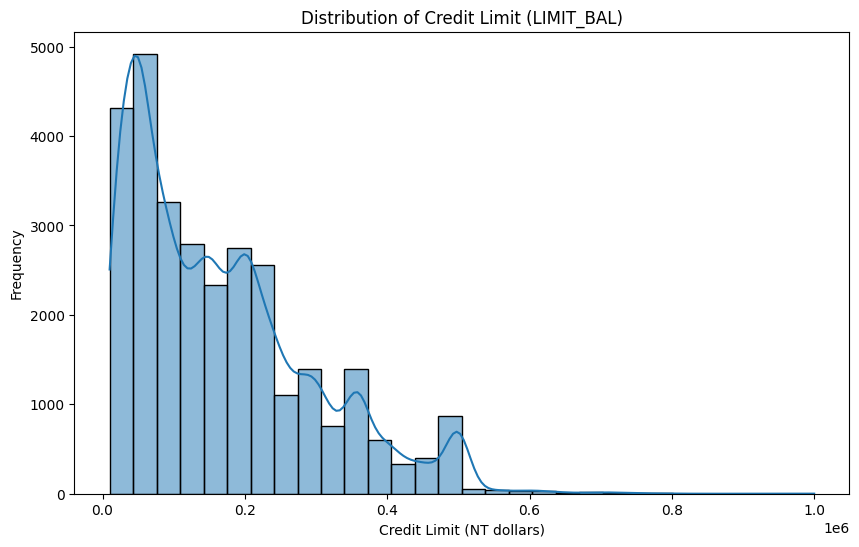

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


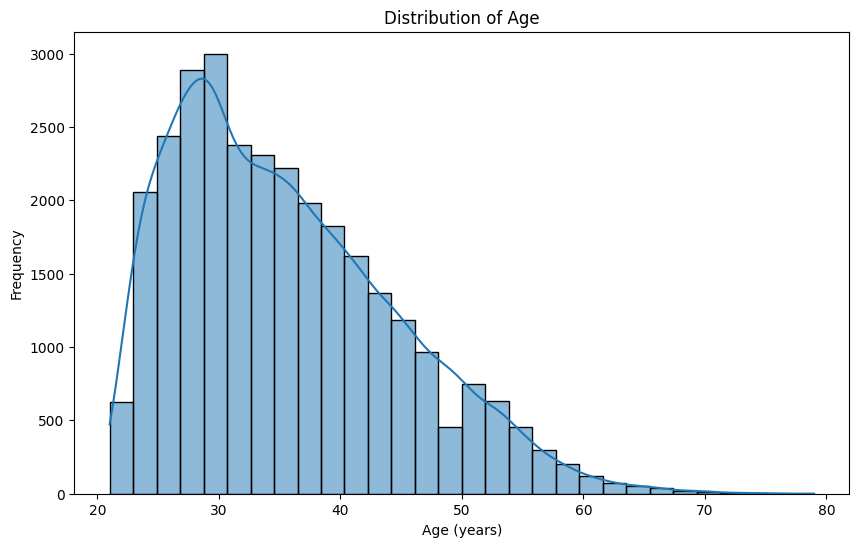

In [ ]:
# Distribution of LIMIT_BAL
plt.figure(figsize=(10, 6))
sns.histplot(df['LIMIT_BAL'], kde=True, bins=30)
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit (NT dollars)')
plt.ylabel('Frequency')
plt.show()

# Distribution of AGE
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()


1. Distribution of Credit Limit (LIMIT_BAL):
The right-skewed distribution suggests that a majority of clients have relatively lower credit limits, which could be indicative of the bank’s risk management strategy or the demographic it caters to.
Understanding this distribution is important for credit risk assessment and for tailoring financial products to the needs of different client segments.
2. Distribution of Age
The concentration of clients in the 30-40 age range suggests that middle-aged individuals are the primary users of credit cards in this dataset.
This age distribution can influence credit risk models since different age groups may exhibit different financial behaviors and risk profiles.
Younger clients (below 30) and older clients (above 60) form smaller portions of the client base, which could be due to varying financial needs and credit access at different life stages.

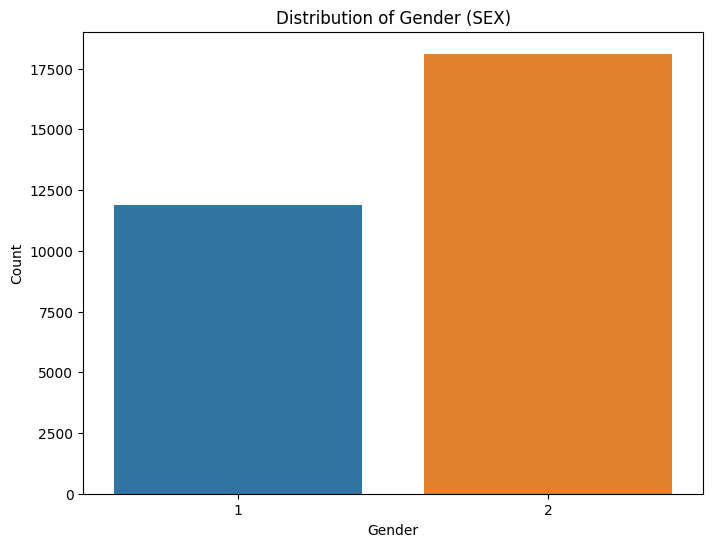

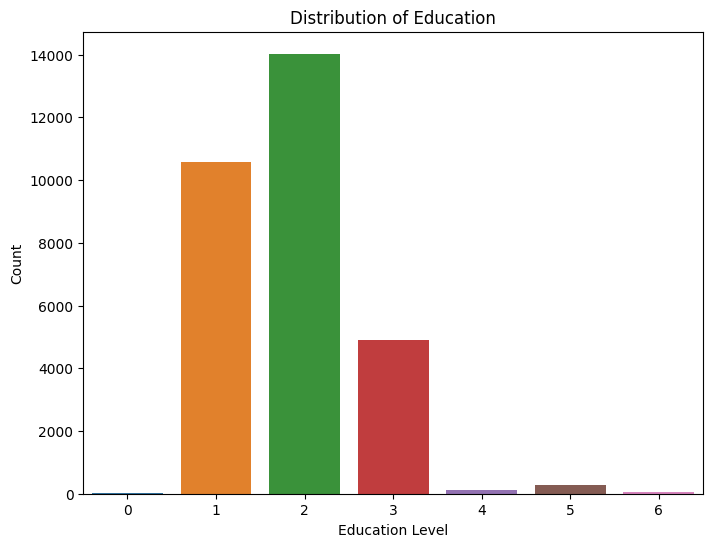

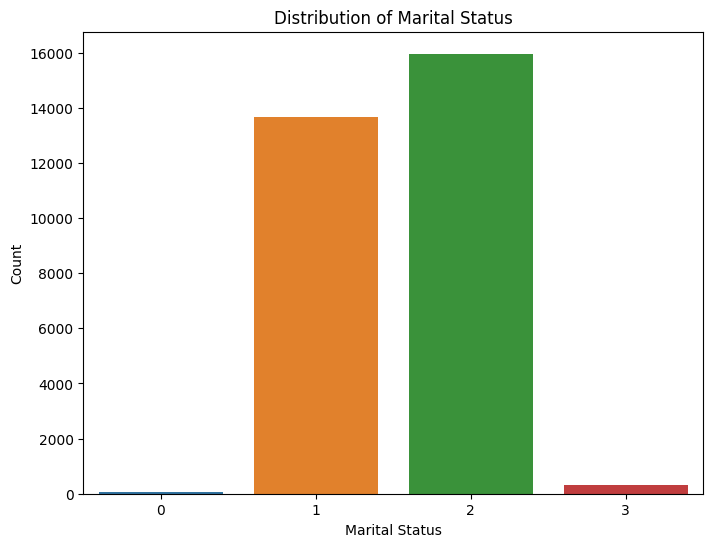

In [ ]:
# Distribution of SEX
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SEX')
plt.title('Distribution of Gender (SEX)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of EDUCATION
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EDUCATION')
plt.title('Distribution of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Distribution of MARRIAGE
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MARRIAGE')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


1. Distribution of Gender (SEX)
This distribution shows a higher number of clients in the gender category '2' compared to '1'. The exact categories can be interpreted based on the dataset documentation, where typically '1' might represent male and '2' female or vice versa.

2. Distribution of Education Level
Most clients fall within the middle education levels, which could represent undergraduate and graduate education.
The lower counts in categories '4', '5', and '6' might indicate specialized education levels or missing/unknown values.

3. Distribution of Marital Status
Categories '1' and '2' likely represent common marital statuses such as single and married.
The very low counts in category '3' and '0' might indicate less common statuses or data entry errors.



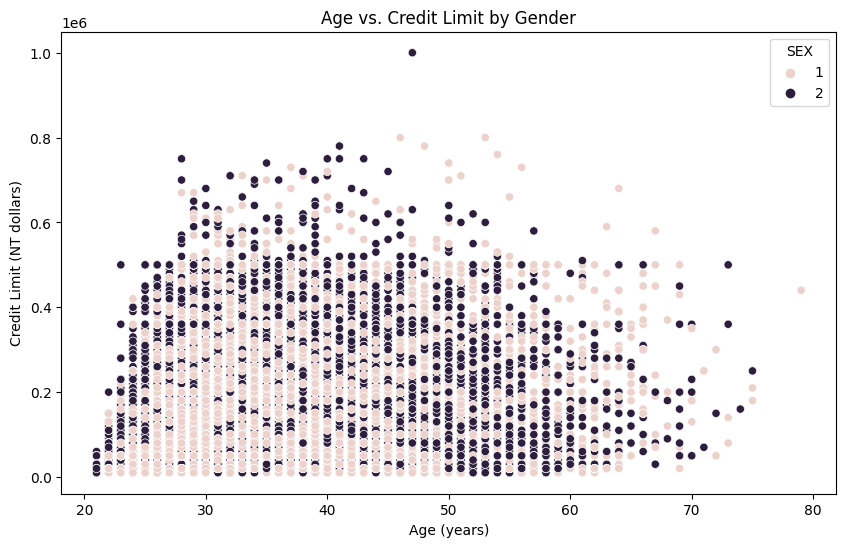

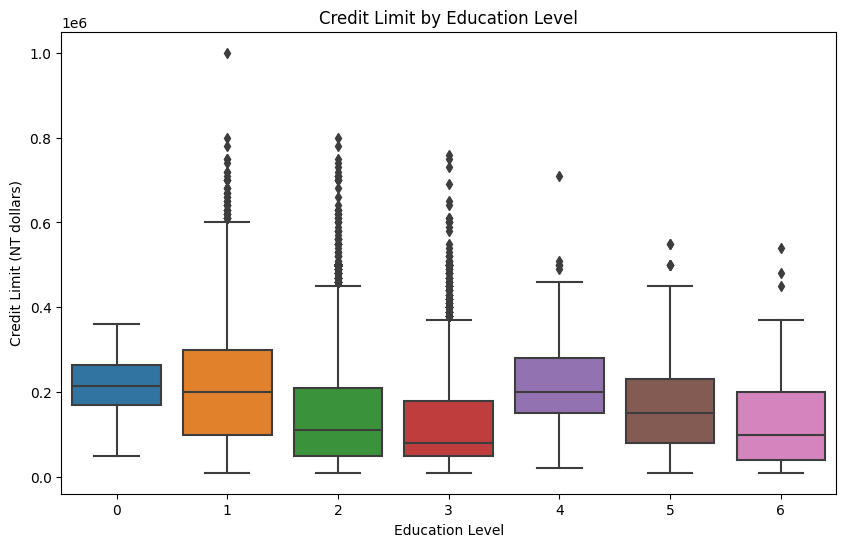

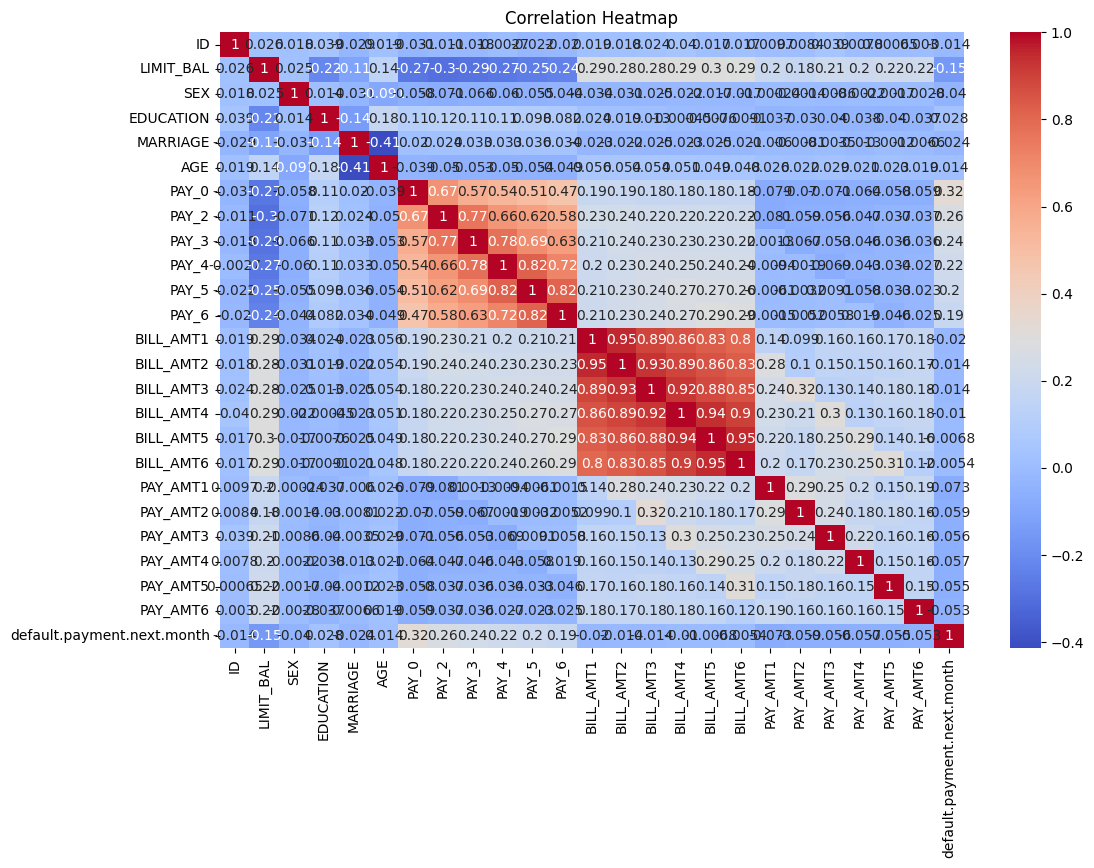

In [ ]:
# Scatter plot of AGE vs. LIMIT_BAL
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AGE', y='LIMIT_BAL', hue='SEX')
plt.title('Age vs. Credit Limit by Gender')
plt.xlabel('Age (years)')
plt.ylabel('Credit Limit (NT dollars)')
plt.show()

# Box plot of LIMIT_BAL by EDUCATION
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='EDUCATION', y='LIMIT_BAL')
plt.title('Credit Limit by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit Limit (NT dollars)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


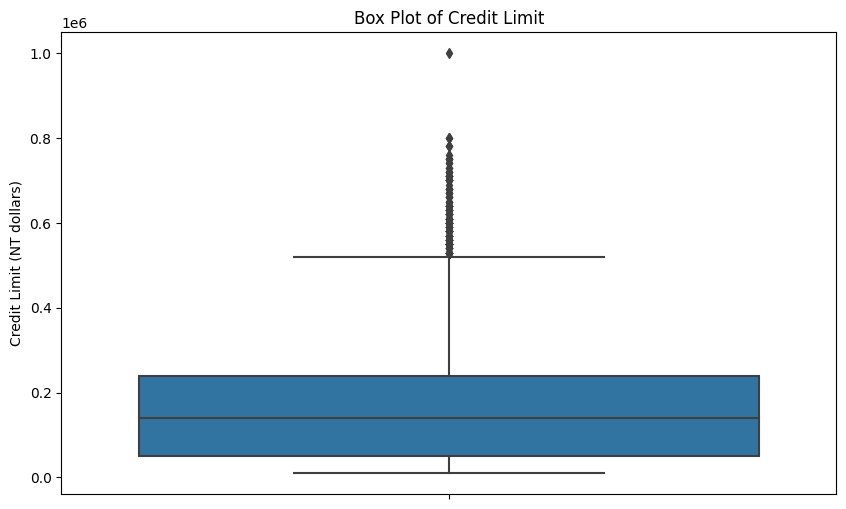

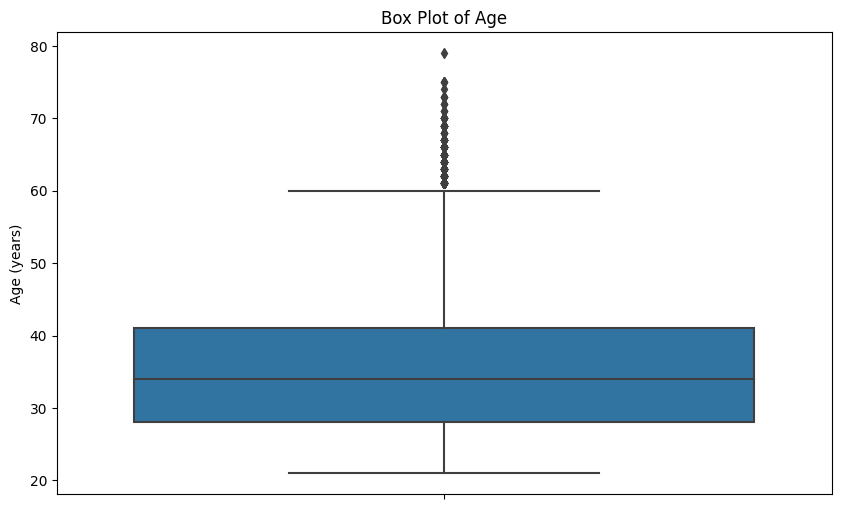

In [ ]:
# Box plot to detect outliers in LIMIT_BAL
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='LIMIT_BAL')
plt.title('Box Plot of Credit Limit')
plt.ylabel('Credit Limit (NT dollars)')
plt.show()

# Outliers in AGE
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='AGE')
plt.title('Box Plot of Age')
plt.ylabel('Age (years)')
plt.show()


1. Box Plot of Credit Limit (LIMIT_BAL)
The median and IQR suggest that the majority of clients have credit limits within the 100,000 to 250,000 NT dollar range.
The presence of outliers indicates that a small number of clients have significantly higher credit limits, which may represent a different risk profile or creditworthiness.
Understanding the distribution of credit limits and the presence of outliers is essential for risk assessment and credit policy formulation.

2. Box Plot of Age
The median and IQR indicate that most clients are between 28 and 41 years old.
The outliers represent older clients, suggesting that while the majority of credit card users are younger, there are also older clients with different financial behaviors.
Analyzing the age distribution helps in understanding the demographic makeup of the client base and tailoring financial products accordingly.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Features and target
X = df.drop(columns=['ID', 'default.payment.next.month'])
y = df['default.payment.next.month']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_prob)}')


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000

ROC-AUC Score: 0.6455252058209647


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model shows high performance for class 0 (no default) with a precision of 0.78, recall of 1.00, and F1-score of 0.88.
For class 1 (default), the model fails to identify any true positives, resulting in precision, recall, and F1-score of 0.00.
The overall accuracy of 0.78 is misleading due to the class imbalance, where the model does not perform well for the minority class.

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.37      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.79      0.81      0.80      9000

ROC-AUC Score: 0.7609420295106679


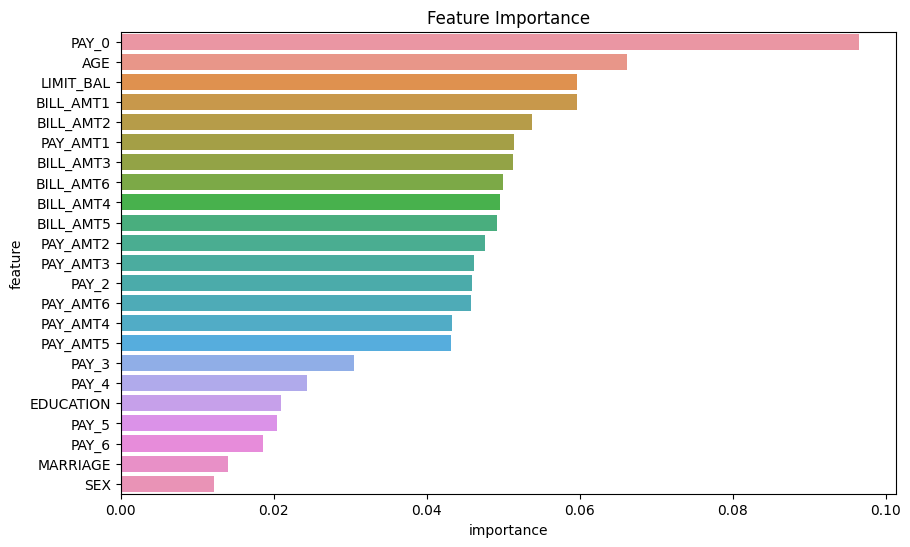

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# RANDOMforest
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_prob)}')
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


The model shows good performance for class 0 (no default) with a precision of 0.84, recall of 0.94, and F1-score of 0.89.
For class 1 (default), the precision is 0.63, recall is 0.37, and F1-score is 0.46, indicating that while the model can identify some defaults, it misses a significant portion.
The overall accuracy of 0.81 and ROC-AUC score of 0.76 indicate a good model, though improvements are needed for better detection of defaults.

Feature Importance

The feature importance plot reveals that PAY_0 (repayment status) is the most significant feature, followed by AGE, LIMIT_BAL, and various billing and payment amounts. Understanding the importance of these features helps in interpreting the model and suggests areas for further analysis and model improvement.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=model_top_features, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train_top, y_train)

# Best parameters and model evaluation
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test_top)
y_prob_best = best_model.predict_proba(X_test_top)[:, 1]

print(classification_report(y_test, y_pred_best))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_prob_best)}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7040
           1       0.68      0.33      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000

ROC-AUC Score: 0.7624748159206864


The model shows good performance for class 0 (no default) with a precision of 0.84, recall of 0.96, and F1-score of 0.89.
For class 1 (default), the precision is 0.68, recall is 0.33, and F1-score is 0.44, indicating that while the model can identify some defaults, it misses a significant portion.
The overall accuracy of 0.82 and ROC-AUC score of 0.76 indicate a good model, though improvements are needed for better detection of defaults.


# **SHAP Analysis **

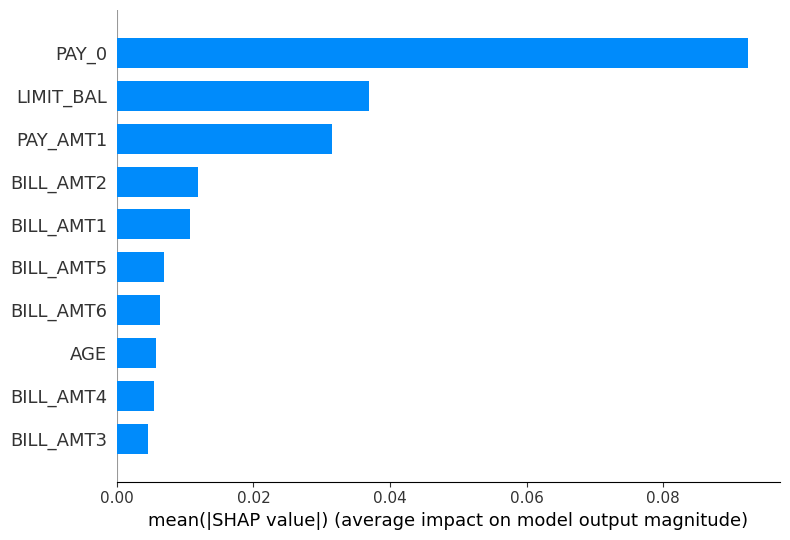

In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_top)

# Summary plot
shap.summary_plot(shap_values[1], X_test_top, plot_type="bar")

# Detailed plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test_top.iloc[0])


**SHAP Summary Plot:**

The SHAP summary plot shows the average impact of each feature on the model output magnitude. PAY_0 (Repayment status in September) has the highest impact, followed by LIMIT_BAL (Credit Limit) and PAY_AMT1 (Payment Amount in September). Other significant features include BILL_AMT2, BILL_AMT1, BILL_AMT5, and BILL_AMT6.

PAY_0 is the most crucial feature, indicating that the repayment status in the most recent month significantly affects the prediction of defaults.Higher credit limits (LIMIT_BAL) also have a substantial impact, suggesting that clients with higher credit limits may exhibit different risk profiles.
The amount paid in the most recent month (PAY_AMT1) is also a critical indicator of financial behavior and risk.
The bill amounts for the past several months (BILL_AMT1 to BILL_AMT6) are important, highlighting the influence of ongoing financial obligations.

**SHAP Force Plot:**

The SHAP force plot provides a detailed view of how each feature contributes to the prediction for an individual instance. Features pushing the prediction higher (towards default) are shown in red, while those pushing it lower (away from default) are shown in blue.

For the given instance, PAY_0 being 0 (indicating no delay) reduces the likelihood of default significantly.
Features like LIMIT_BAL = 30000, BILL_AMT1, and BILL_AMT2 have a mixed effect but collectively increase the likelihood of default.
PAY_AMT1 = 1500 has a mitigating effect, reducing the risk of default.

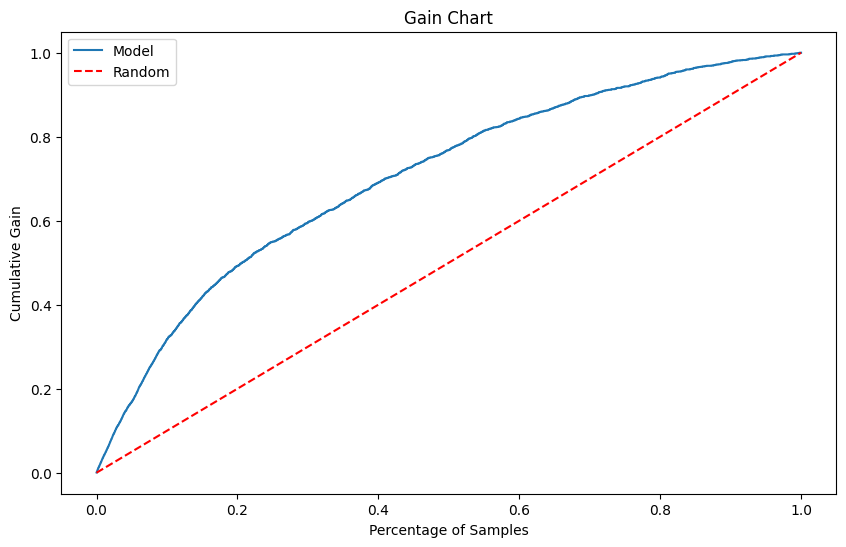

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Combine actual and predicted probabilities into a DataFrame
data = pd.DataFrame({'actual': y_test, 'prob': y_prob_best})

# Sort by predicted probabilities
data = data.sort_values(by='prob', ascending=False).reset_index(drop=True)

# Calculate cumulative actual positive cases
data['cumulative_actual'] = data['actual'].cumsum()

# Calculate cumulative gains
data['cumulative_gain'] = data['cumulative_actual'] / data['actual'].sum()

# Calculate the percentage of samples
data['percentage_of_samples'] = np.arange(1, len(data) + 1) / len(data)

# Plot the Gain Chart
plt.figure(figsize=(10, 6))
plt.plot(data['percentage_of_samples'], data['cumulative_gain'], label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.title('Gain Chart')
plt.xlabel('Percentage of Samples')
plt.ylabel('Cumulative Gain')
plt.legend()
plt.show()


**Gain Chart**

The gain chart compares the cumulative gain of the model to that of a random classifier. The blue line represents the model's performance, while the red dashed line represents the performance of a random classifier.

The gain chart shows that the model performs significantly better than a random classifier. At 20% of the samples, the model captures around 60% of the defaults, demonstrating its effectiveness in identifying high-risk clients. The cumulative gain continues to increase as more samples are considered, reaching nearly 100% at the 100% sample mark, indicating the model's comprehensive coverage of the dataset.

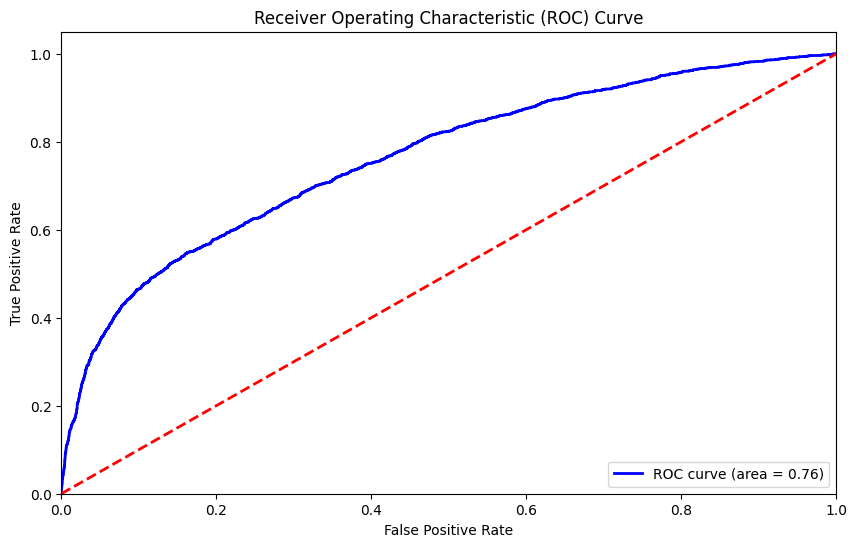

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



**ROC Curve**

The ROC (Receiver Operating Characteristic) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The area under the ROC curve (AUC) for the final model is 0.76.

The AUC value of 0.76 indicates that the model has a good ability to distinguish between the positive class (default) and the negative class (no default). While the model performs better than random guessing (AUC = 0.5), there is still room for improvement. The ROC curve provides a visual tool to understand the trade-offs between sensitivity (recall) and specificity, which is essential in credit risk assessment where the cost of false positives and false negatives can differ significantly.